In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif",
                     "font.sans-serif":"Arial"})
plt.rcParams["font.family"] = "DejaVu Sans"  # Available in Colab

Recall that in PHYS 207, you were often asked to plot displacement as a function of time. For example, for a baseball thrown directly upward you would plot $y(t)$, and for a block on a horizontal spring you would plot $x(t)$. Here we will examine how the displacement and time axes "scissor together" at relativistic speeds.

The convention in relativity is to reverse the axes: $ct$ is vertical and $x$ is horizontal. Time moves forward from the bottom to the top of the plot:

(-1.0, 1.0, -1.0, 1.0)

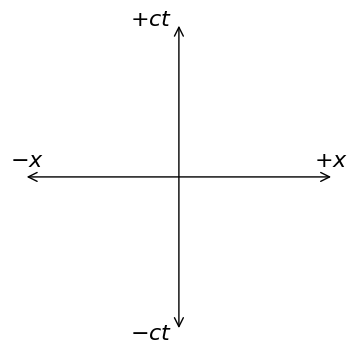

In [13]:
plt.figure(figsize=(4,4))
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.annotate(text='', xy=(-1,0), xytext=(1,0), arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='', xy=(0,-1), xytext=(0,1), arrowprops=dict(arrowstyle='<->'))
plt.text(0.98, 0.04, r"$+x$", horizontalalignment='center', verticalalignment='bottom')
plt.text(-0.98, 0.04, r"$-x$", horizontalalignment='center', verticalalignment='bottom')
plt.text(-0.04, 1.02, r"$+ct$", horizontalalignment='right', verticalalignment='center')
plt.text(-0.04, -1.02, r"$-ct$", horizontalalignment='right', verticalalignment='center')
plt.axis('off')

Imagine that frame $K^{\prime}$ is moving in the $+x$ direction at speed $v$ relative to frame $K$. You are at rest in frame $K$. Let's figure out how the set of $(x^{\prime}, ct^{\prime})$ axes would look to you when the frames' origins $O$ and $O^{\prime}$ coincide.

<ol>
    <li>Use the fact that $x^{\prime} = 0$ on the $ct^{\prime}$ axis to define a line $ct(x)$ in frame $K$ that follows the $ct^{\prime}$ axis. Write a function that computes points on the line. $v$ will be one of your function inputs.</li>
</ol>

In [14]:
def ct_prime_axis(ct_values, v, c=constants.c):
    x_values = v / c * ct_values
    return x_values

<ol start=2>
    <li>Use the fact that $ct^{\prime} = 0$ on the $x^{\prime}$ axis to define a line $ct(x)$ that traces the $x^{\prime}$ axis in frame $K$. Write a second function that computes points on this line.</li>
</ol>

In [15]:
def x_prime_axis(ct_values, v, c=constants.c):
    x_values = ct_values / (v / c)
    return x_values

<ol start=3>
    <li>The code below creates a figure with centered $(x, ct)$ axes that have range $(-10^{10}, 10^{10})$ m. We are using $ct$ instead of just $t$ on our vertical axis so that both axes have the same units. Use your functions from problems 1 and 2 to overplot the $ct^{\prime}$ and $x^{\prime}$ axes <strong>as a function of $x$</strong> for $v = 0.2c$. Make your $ct^{\prime}$ and $x^{\prime}$ axes red, and label them in red. Also add black labels to the $(x, ct)$ axes giving the coordinate name ($x$ or $ct$) and the units.</li>
</ol>

Text(0, 10000000000.0, 'ct (m)')

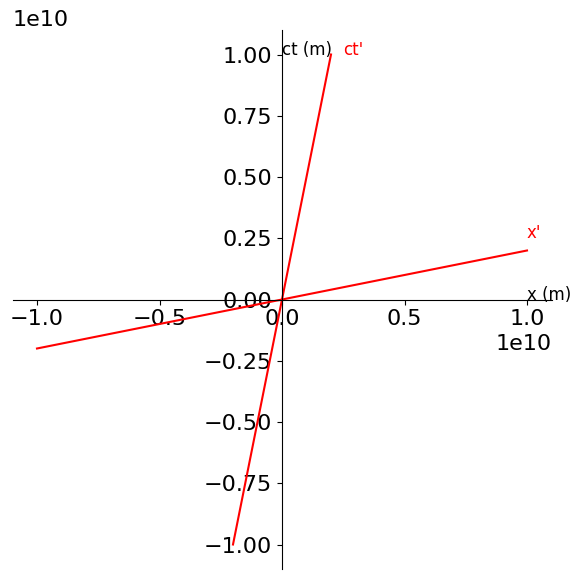

In [24]:
# Set up an array of independent variables x that spans (-1e10, 1e10) m
x = np.linspace(0, 2e10, num=201, endpoint=True) - 1e10

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# YOUR CODE HERE: Use ax.plot() to plot the ct' and x' axes below
# Define ct array matching x range, and velocity v = 0.2c
ct = np.linspace(-1e10, 1e10, num=201)
v = 0.2 * constants.c

# Plot ct' axis (x' = 0): x = (v/c) * ct
x_ct_prime = ct_prime_axis(ct, v)
ax.plot(x_ct_prime, ct, color='red', label="ct' axis")

# Plot x' axis (ct' = 0): ct = (v/c) * x, so ct = (v/c) * x
ct_x_prime = x * (v / constants.c)  # Corrected to use x as independent variable
x_x_prime = x  # x is the independent variable
ax.plot(x_x_prime, ct_x_prime, color='red', label="x' axis")

# Move the left and bottom "spines" (borders of the plot) to the center
# This makes a math textbook-like set of (x,ct) axes instead of a box around the plot
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# YOUR CODE HERE: Use ax.text() to add RED labels to the ct' and x' axes below
# Add red labels for ct' and x' axes
ax.text(2.5e9, 1e10, "ct'", color='red', fontsize=12)
ax.text(1e10, 2.5e9, "x'", color='red', fontsize=12)

# Add black labels for x and ct axes with units
ax.text(1e10, 0, "x (m)", color='black', fontsize=12)
ax.text(0, 1e10, "ct (m)", color='black', fontsize=12)

<ol start=4>
    <li>Make a figure that plots $ct^{\prime}$ and $x^{\prime}$ axes for $v = 0.25c$, $v = 0.5c$, and $v = 0.75c$. Use different colors for each pair of axes. Make a legend that shows which value of $v$ corresponds to each color. Label the $(x, ct)$ axes and add units.</li>
</ol>

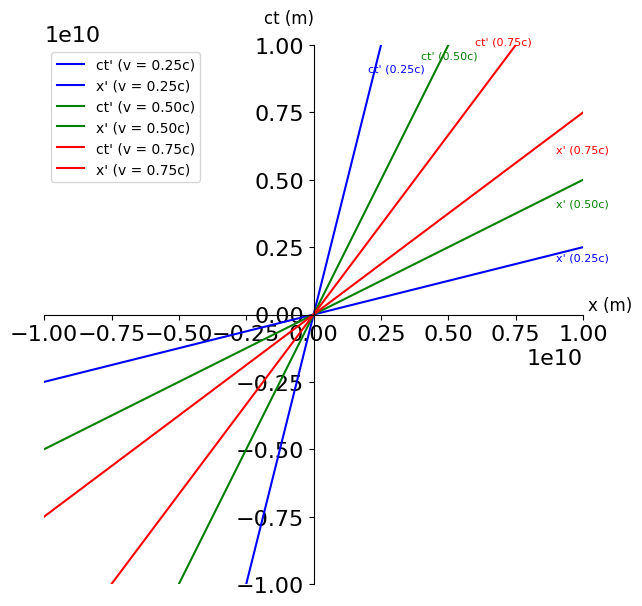

In [31]:
# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# Define ct array and velocities
ct = np.linspace(-1e10, 1e10, num=201)
x = np.linspace(-1e10, 1e10, num=201)
velocities = [0.25 * constants.c, 0.5 * constants.c, 0.75 * constants.c]
colors = ['blue', 'green', 'red']
ct_offsets = [0, 0.05e10, 0.1e10]  # Small offsets for ct' labels

# Plot ct' and x' axes for each v with individual labels
for v, color, offset in zip(velocities, colors, ct_offsets):
    # ct' axis: x = (v/c) * ct
    x_ct_prime = ct_prime_axis(ct, v)
    ax.plot(x_ct_prime, ct, color=color, label=f"ct' (v = {v/constants.c:.2f}c)")
    ax.text(0.8e10 * (v/constants.c), 0.9e10 + offset, f"ct' ({v/constants.c:.2f}c)", color=color, fontsize=8)

    # x' axis: ct = (v/c) * x
    ct_x_prime = x * (v / constants.c)
    ax.plot(x, ct_x_prime, color=color, label=f"x' (v = {v/constants.c:.2f}c)")
    ax.text(0.9e10, 0.8e10 * (v/constants.c), f"x' ({v/constants.c:.2f}c)", color=color, fontsize=8)

# Move spines
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Equal aspect ratio
ax.set_aspect('equal')

# Set axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# Add labels for x and ct axes with units at specific positions
ax.text(1.1e10, 0, "x (m)", color='black', fontsize=12, ha='center', va='bottom')
ax.text(0, 1.1e10, "ct (m)", color='black', fontsize=12, ha='right', va='center')

# Add legend
ax.legend(loc='upper left', fontsize=10)

<ol start=5>
    <li>Connect your graph from problem 4 with the discussion of world lines in Chapter 2 of your textbook. What kind of world line do your $(x^{\prime}, ct^{\prime})$ axes approach as $v \rightarrow c$? Create a similar plot to problem 4, but this time plot $(x^{\prime}, ct^{\prime})$ axes for $v = 0.5, 0.75, 0.875, 0.9375$. To illustrate the concept of taking a limit as $v \rightarrow c$, make each set of $( x^{\prime}, ct^{\prime})$ axes a successively darker shade of gray. Plot the limiting world line in black. Add a legend to show which value of $v$ corresponds to which shade of gray. You may find it helpful to specify line colors like this: <tt>color='0.7'</tt>.</li>
</ol>

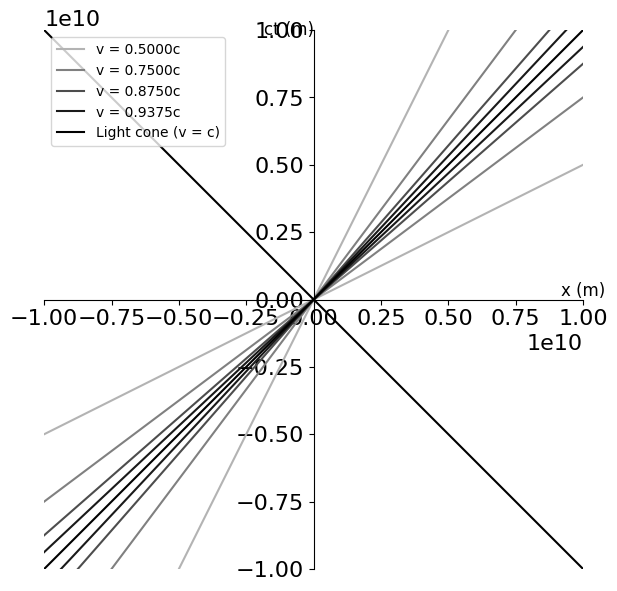

In [32]:
# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# Define ct array and velocities
ct = np.linspace(-1e10, 1e10, num=201)
x = np.linspace(-1e10, 1e10, num=201)
velocities = [0.5 * constants.c, 0.75 * constants.c, 0.875 * constants.c, 0.9375 * constants.c]
gray_shades = ['0.7', '0.5', '0.3', '0.1']  # Lighter to darker gray

# Plot ct' and x' axes for each v
for v, shade in zip(velocities, gray_shades):
    # ct' axis: x = (v/c) * ct
    x_ct_prime = ct_prime_axis(ct, v)
    ax.plot(x_ct_prime, ct, color=shade, label=f"v = {v/constants.c:.4f}c")

    # x' axis: ct = (v/c) * x
    ct_x_prime = x * (v / constants.c)
    ax.plot(x, ct_x_prime, color=shade)

# Plot limiting world line (v -> c, x = ct and x = -ct)
ax.plot(ct, ct, color='black', label='Light cone (v = c)')
ax.plot(-ct, ct, color='black')

# Move spines
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Equal aspect ratio
ax.set_aspect('equal')

# Set axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# Add labels for x and ct axes with units
ax.text(1e10, 0, "x (m)", color='black', fontsize=12, ha='center', va='bottom')
ax.text(0, 1e10, "ct (m)", color='black', fontsize=12, ha='right', va='center')

# Add legend
ax.legend(loc='upper left', fontsize=10)